Анализ данных обучающих курсов

Набор данных взят с платформы kaggle:
https://www.kaggle.com/c/riiid-test-answer-prediction/data
Воспользуемся данными файла train.csv. База данных содержит свыше 101 млн. строк о прохождении тестовых заданий пользователями.

1. Импорт и подготовка данных.

Типы данных были рекомендованы в описании набора данных kaggle.

In [1]:

import pandas as pd

df = pd.read_csv('train.csv',
                       dtype={'content_id': 'int16',
                               'content_type_id': 'int8',
                               'task_container_id': 'int16',
                               'user_answer': 'int8',
                               'answered_correctly': 'int8',
                               'prior_question_elapsed_time': 'float32'})

Посмотрим, какие данные содержит база. Описание данных представлено по ссылке выше.

In [2]:
df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


Посмотрим на структуру данных.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  object 
dtypes: float32(1), int16(2), int64(3), int8(3), object(1)
memory usage: 4.1+ GB


Следует проверить данные на наличие пустых записей. Столько их в абсолютном значении.

In [4]:
df.isna().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

Проверим, сколько этих данных в среднем.

In [5]:
df[['prior_question_elapsed_time', 'prior_question_had_explanation']].isna().mean()

prior_question_elapsed_time       0.023230
prior_question_had_explanation    0.003877
dtype: float64

Количество строк данных 2,32 + 0,39 = 2,71 %, не более. Таким количеством данных можно пренебречь, и удалить строки.

In [6]:
df = df.dropna()

Проверим работу команды - пустые записи отсутствуют.

In [7]:
df.isna().sum()

row_id                            0
timestamp                         0
user_id                           0
content_id                        0
content_type_id                   0
task_container_id                 0
user_answer                       0
answered_correctly                0
prior_question_elapsed_time       0
prior_question_had_explanation    0
dtype: int64

Чтобы далее было проще работать с числовыми данными, преобразует данные столбца, содержащего булевы значения.

In [8]:
df['prior_question_had_explanation'] = df['prior_question_had_explanation'].replace([True, False], [1, 0]).apply(pd.to_numeric, errors='coerce')
df.head(15)

C:\Users\Андрей\AppData\Local\Temp\ipykernel_5144\2431330145.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['prior_question_had_explanation'] = df['prior_question_had_explanation'].replace([True, False], [1, 0]).apply(pd.to_numeric, errors='coerce')


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
1,1,56943,115,5716,0,2,2,1,37000.0,0
2,2,118363,115,128,0,0,0,1,55000.0,0
3,3,131167,115,7860,0,3,0,1,19000.0,0
4,4,137965,115,7922,0,4,1,1,11000.0,0
5,5,157063,115,156,0,5,2,1,5000.0,0
6,6,176092,115,51,0,6,0,1,17000.0,0
7,7,194190,115,50,0,7,3,1,17000.0,0
8,8,212463,115,7896,0,8,2,1,16000.0,0
9,9,230983,115,7863,0,9,0,1,16000.0,0
10,10,255381,115,152,0,10,2,0,17000.0,0


Проверим работу команды - тип целочисленных данных int64 назначен автоматически.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98878794 entries, 1 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  int64  
dtypes: float32(1), int16(2), int64(4), int8(3)
memory usage: 4.7 GB


2. Посмотрим количество пользователей - 393569, и количество повторений обращений пользователей к информационной системе (ИС) - от 1 до 17608 раз.

In [10]:
user_id_cnt = df['user_id'].value_counts()
user_id_cnt

user_id
801103753     17608
1478712595    16841
455973631     16639
1842816145    16532
1743444187    16423
              ...  
634300229         1
1275082149        1
1923215435        1
795396619         1
626540011         1
Name: count, Length: 393569, dtype: int64

Посмотрим на примере первых 10 пользователей, какое количество обращений к ИС в зависимости от типа обращения: 0 - тесты; 1 - лекции. Лекции пользователей отсутсвуют.

In [11]:
user_content_grp = df.groupby(['user_id', 'content_type_id']).size().unstack()
user_content_grp.head(10)

content_type_id,0
user_id,
115,45
124,29
2746,18
5382,124
8623,108
8701,16
12741,264
13134,1242
24418,6282


Для наглядности, представим эти данные в виде горизонтальной столбчатой диаграммы. Шкала х логарифмическая.

<Axes: ylabel='user_id'>

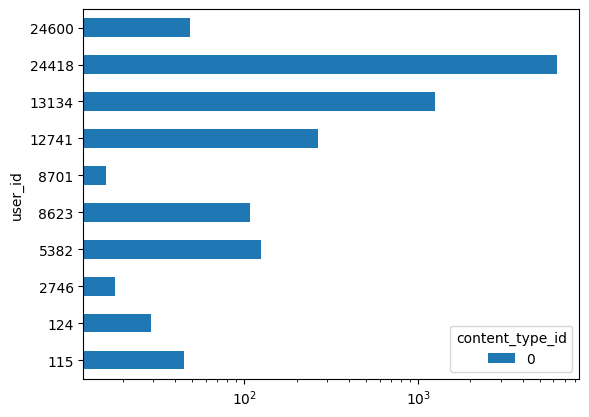

In [12]:
subset_ucg = user_content_grp.head(10)
subset_ucg.plot.barh(log='True', stacked='True')

3. Посмотрим, какое количество тестовых заданий - 10000, и количество попыток их выполнения пользователями - от 169 до 801910. Количество тестовых заданий составляет 10 тыс.

In [13]:
df['task_container_id'].value_counts()

task_container_id
14      801910
15      796490
4       692028
5       689965
6       688749
         ...  
9932       173
9999       172
9925       171
9926       170
9937       169
Name: count, Length: 10000, dtype: int64

Количество попыток каждого пользователя по тестовым заданиям значительно разнородны.

In [14]:
user_task_grp = df.groupby(['user_id', 'task_container_id']).size().unstack()
user_task_grp.head(10)

C:\Users\Андрей\AppData\Local\Temp\ipykernel_5144\385260460.py:1: PerformanceWarning: The following operation may generate 3935690000 cells in the resulting pandas object.
  user_task_grp = df.groupby(['user_id', 'task_container_id']).size().unstack()


task_container_id,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
user_id,,,,,,,,,,,,,,,,,,,,,
115,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,1.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2746,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5382,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8623,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12741,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13134,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24418,NaN,1.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. Проверим, какое количество правильных и неправильных ответов на тестовые вопросы давал каждый пользователь.

In [15]:
user_content_anscor_grp = df.groupby(['user_id', 'answered_correctly']).size().unstack()
user_content_anscor_grp.head(10)

answered_correctly,0,1
user_id,,
115,14.0,31.0
124,23.0,6.0
2746,7.0,11.0
5382,41.0,83.0
8623,39.0,69.0
8701,7.0,9.0
12741,112.0,152.0
13134,365.0,877.0
24418,1945.0,4337.0


Посмотрим на это в виде горизонтальной столбчатой диаграммы. Шкала х логарифмическая.

<Axes: ylabel='user_id'>

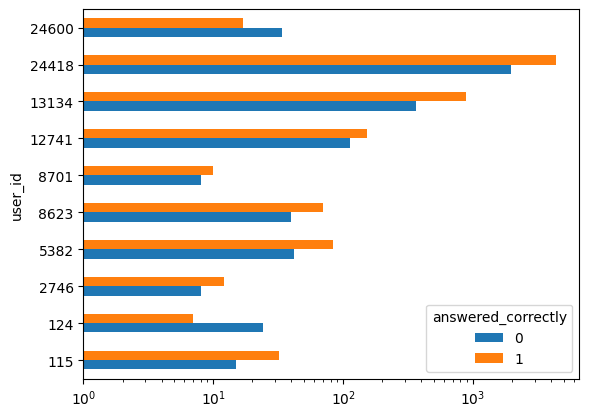

In [16]:
subset_ucag = user_content_anscor_grp.head(10)
subset_ucag.plot.barh(log='True')

5. Посмотрим содержание столбца 'prior_question_elapsed_time', который содержит информацию о среднем времени выполнения тестового задания.

In [17]:
df['prior_question_elapsed_time'].value_counts()

prior_question_elapsed_time
17000.0     5154588
16000.0     4752104
18000.0     4670915
19000.0     4017031
15000.0     3640279
             ...   
222600.0          1
297200.0          1
299666.0          1
256400.0          1
252800.0          1
Name: count, Length: 3258, dtype: int64

Постоил гистрограмму распределения среднего времени (в милисекундах) выполнения заданий. Шкала y логарифмическая - количество повторений.

<Axes: title={'center': 'Время на выполнение заданий'}, xlabel='Время, милисекунды', ylabel='Количество повторений'>

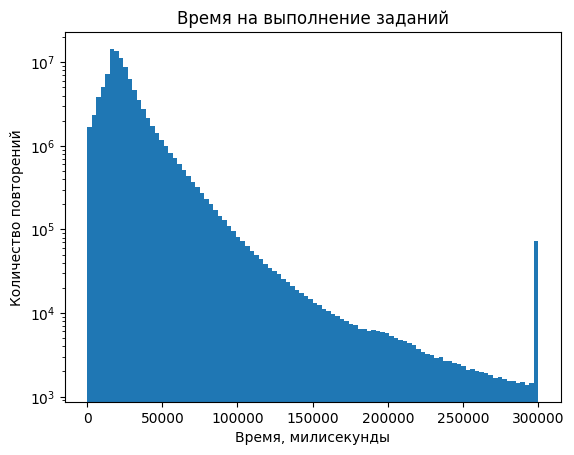

In [18]:
user_time = df['prior_question_elapsed_time']
user_time.plot.hist(bins=100, title='Время на выполнение заданий', ylabel='Количество повторений', xlabel='Время, милисекунды', logy=True)